In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tables = ['open_data_main_tokenized', 'gittables_main_tokenized', 'cocoa_main_tokenized', 'main_tokenized']

opendata,gittables,cocoa,main = tables


bitwidth = dict()
linear = dict()

for t in tables:
    lin = pd.read_csv(f'./Histograms/{t}-histo.csv', sep=";")
    width = pd.read_csv(f'./Histograms/{t}-histo.csv-bitwidth.csv', sep=";")

    bitwidth[t] = width
    linear[t] = lin


info = pd.read_csv("./Histograms/table-info.csv", sep=";")
info

,table,values,distinct_values,mean_cardinality,avg_cell_len,avg_tableid,avg_colid,avg_rowid
0,cocoa_main_tokenized,8314523826,645008253,12.890569674617792,9.08744661043924,73259155.732528,4.8692540024239745,111.40470313386771
1,gittables_main_tokenized,1588021298,97488582,16.28930553118518,12.468851436021483,849482.2992762141,18.848093896911955,476.73429396977775
2,main_tokenized,8314523826,645008253,12.890569674617792,9.08744661043924,73259155.732528,4.8692540024239745,111.40470313386771
3,open_data_main_tokenized,799930934,19776045,40.44948997638304,7.986371162138355,9939.454180108005,267.5812127663011,1058475.1833108694
4,table,values,distinct_values,mean_cardinality,avg_cell_len,avg_tableid,avg_colid,avg_rowid
5,cocoa_main_tokenized,8314523826,645008253,12.890569674617792,9.08744661043924,73259155.732528,4.8692540024239745,111.40470313386771
6,table,values,distinct_values,mean_cardinality,avg_cell_len,avg_tableid,avg_colid,avg_rowid
7,gittables_main_tokenized,1588021298,97488582,16.28930553118518,12.468851436021483,849482.2992762141,18.848093896911955,476.73429396977775
8,table,values,distinct_values,mean_cardinality,avg_cell_len,avg_tableid,avg_colid,avg_rowid
9,main_tokenized,8314523826,645008253,12.890569674617792,9.08744661043924,73259155.732528,4.8692540024239745,111.40470313386771


In [3]:
bitwidth[opendata]

,rows,cols,tableids
0,0,0,0
1,853801,124889852,888
2,818390,117569773,2076
3,1600526,199075358,1672
4,3047560,82812890,668
...,...,...,...
59,0,0,0
60,0,0,0
61,0,0,0
62,0,0,0


In [4]:
import math
def takeSparse(values):
    i = len(values)
    while i > 0:
        if values[i-1] != 0:
            return values[:i]
    
        i -= 1
    
    return []

def normalize(values):
    values = np.array(values)
    distance = math.sqrt((values * values).sum())

    return values / distance

def bitwidthHistogram(values, title, label, plt=plt):
    # cut out redundant information
    values = takeSparse(values)
    
    fig, ax = plt.subplots()
    x = list(range(len(values)))

    ax.bar(x, values, width=1,label=label)
    
    ax.set_xlabel("bitwidth")
    ax.set_ylabel("# of occurences")
    ax.legend()
    ax.set_title(title)
    return fig

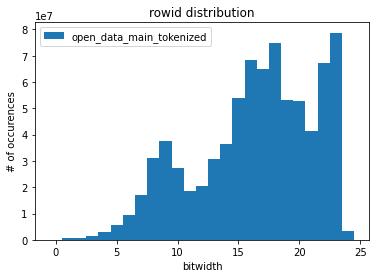

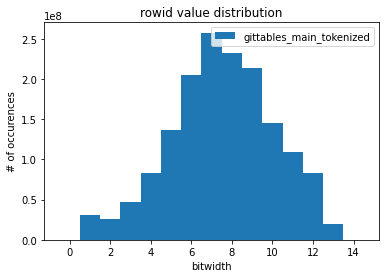

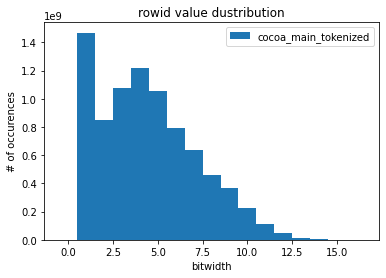

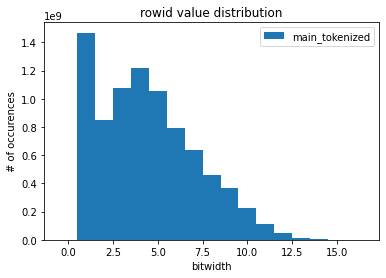

In [5]:
bitwidthHistogram(bitwidth[opendata]['rows'], "rowid distribution", opendata)
bitwidthHistogram(bitwidth[gittables]['rows'], "rowid value distribution", gittables)
bitwidthHistogram(bitwidth[cocoa]['rows'], "rowid value dustribution", cocoa)
_=bitwidthHistogram(bitwidth[main]['rows'], "rowid value distribution", main)

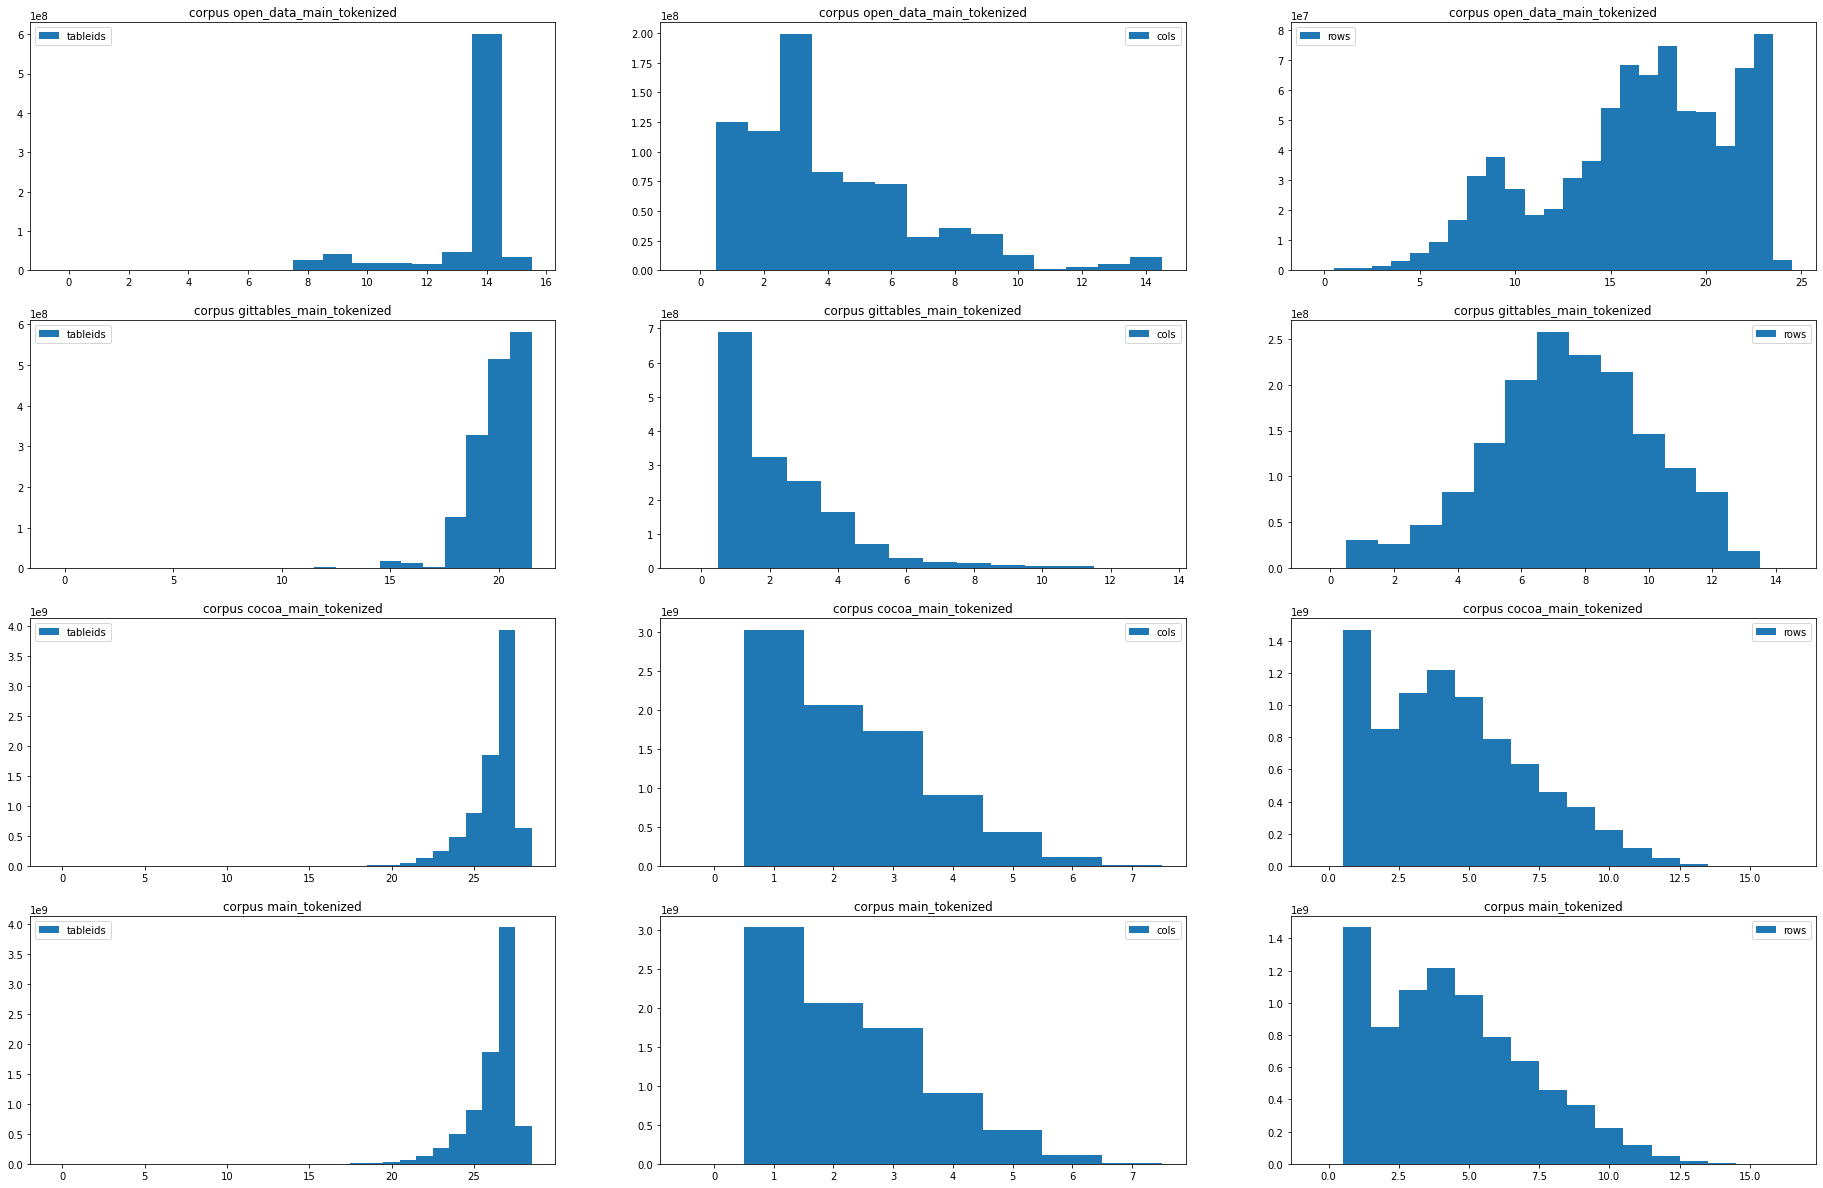

In [9]:
histograms = ["tableids", "cols", "rows"]

fig, axss = plt.subplots(4, 3, figsize=(32, 21))

for i in range(4):
    for j in range(3):
        table = tables[i]
        field = histograms[j]
        data  = takeSparse(bitwidth[table][field][:64])

        ax = axss[i][j]

        x = list(range(len(data)))

        ax.bar(x, data, width=1, label=field)
        ax.set_title(f'corpus {table}')
        ax.legend()